In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./data/train_3mdad_keypoints.csv') # , index_col=0

In [3]:
data.columns = ['keypts', 'label']
data = pd.concat([data['keypts'].str.split(',', expand=True), data['label']], axis=1)

In [4]:
x_cols = data.columns.drop('label')
data[x_cols] = data[x_cols].apply(pd.to_numeric, errors='coerce')

In [5]:
class_names = ['AC01', 'AC02', 'AC03', 'AC04', 'AC05', 'AC06', 'AC07', 'AC08', 'AC09', 'AC10', 'AC11', 'AC12', 'AC13', 'AC14', 'AC15', 'AC16']

In [6]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,label
87295,20,28,36,28,44,12,64,32,60,32,...,52,80,76,64,52,48,72,76,72,AC16
87296,16,28,40,24,40,12,72,16,52,28,...,72,80,76,72,48,52,68,80,76,AC16
87297,20,36,40,28,44,12,72,28,68,56,...,52,84,76,64,36,52,72,80,72,AC16
87298,16,24,40,24,48,8,76,12,92,8,...,72,84,76,68,52,52,72,72,72,AC16
87299,16,32,36,28,44,16,52,44,44,64,...,40,84,76,52,72,48,72,76,72,AC16


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87300 entries, 0 to 87299
Data columns (total 29 columns):
0        87300 non-null int64
1        87300 non-null int64
2        87300 non-null int64
3        87300 non-null int64
4        87300 non-null int64
5        87300 non-null int64
6        87300 non-null int64
7        87300 non-null int64
8        87300 non-null int64
9        87300 non-null int64
10       87300 non-null int64
11       87300 non-null int64
12       87300 non-null int64
13       87300 non-null int64
14       87300 non-null int64
15       87300 non-null int64
16       87300 non-null int64
17       87300 non-null int64
18       87300 non-null int64
19       87300 non-null int64
20       87300 non-null int64
21       87300 non-null int64
22       87300 non-null int64
23       87300 non-null int64
24       87300 non-null int64
25       87300 non-null int64
26       87300 non-null int64
27       87300 non-null int64
label    87300 non-null object
dtypes: int64(28), o

# Exploration des données

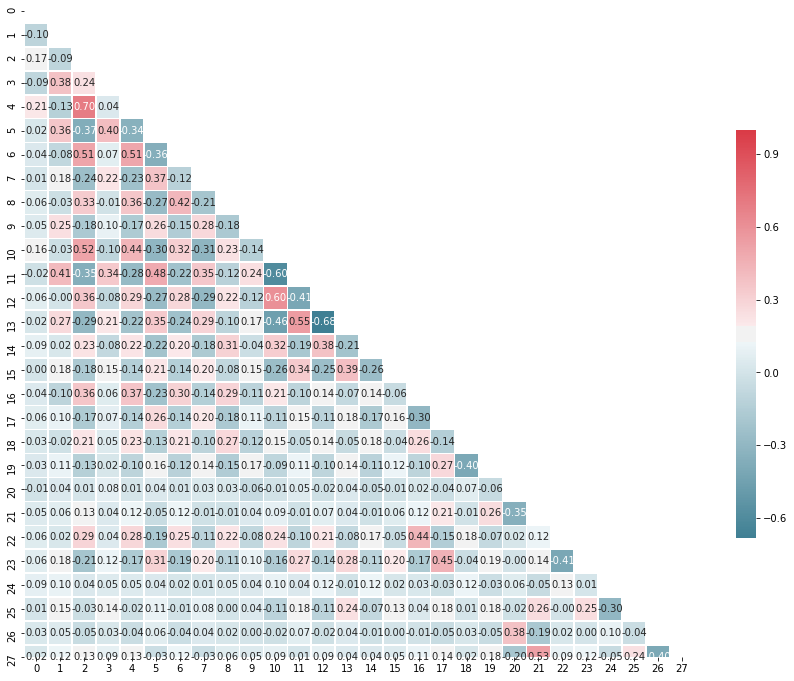

In [8]:
corr = data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 15))

colormap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=colormap, annot=True, fmt=".2f",
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

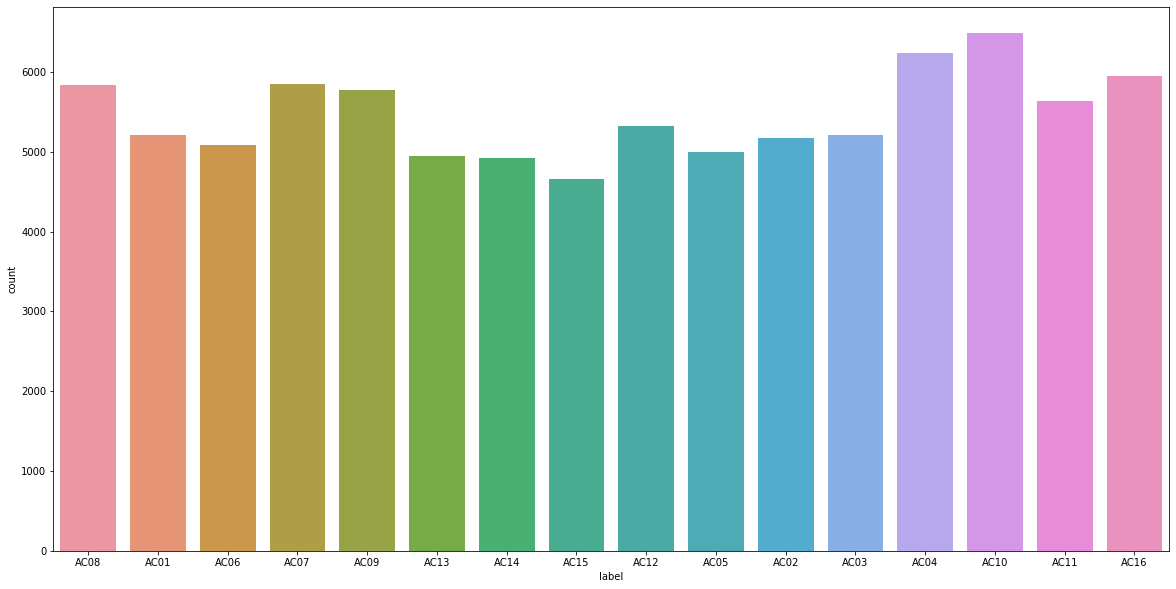

In [9]:
plt.figure(figsize=(20, 10))
sns.countplot(x='label', data=data)

In [10]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,label
0,32,40,20,56,52,36,76,32,68,44,...,52,92,48,52,72,68,52,80,72,AC08
1,20,32,40,24,44,12,68,32,64,44,...,48,64,52,60,36,48,56,72,64,AC08
2,24,44,48,36,56,24,72,32,56,40,...,48,84,76,68,52,68,56,80,76,AC08
3,20,32,40,24,48,12,72,40,52,32,...,56,84,76,72,52,48,72,72,72,AC08
4,12,32,0,0,0,0,48,56,52,56,...,40,80,56,80,72,52,76,88,44,AC08


In [11]:
x_cols

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
      dtype='object')

In [12]:
# x_cols = np.setdiff1d(data.columns, ["label"])
y = data['label']
X = data[x_cols]

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_auc_score, roc_curve, classification_report,
                             accuracy_score, log_loss, f1_score, precision_score,
                             recall_score)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [15]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

categorical_columns = np.setdiff1d(data.select_dtypes(['category']).columns.tolist(), ["label"])
numerical_columns = data.select_dtypes(['int', 'float']).columns.tolist()

categ_encode = LabelEncoder()
num_encode = StandardScaler()

x_train_pre, x_test_pre = pd.DataFrame(), pd.DataFrame()

for col in categorical_columns:
    x_train_pre[col] = categ_encode.fit_transform(X_train[col])
    x_test_pre[col] = categ_encode.fit_transform(X_test[col])
    
# for num_col in numerical_columns:
x_train_pre = num_encode.fit_transform(X_train[x_cols])
x_test_pre = num_encode.fit_transform(X_test[x_cols])
    

In [16]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    # SVC(probability=True),
    # NuSVC(probability=True),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier()
]

log_cols=["Classifier", "Accuracy", "Log Loss", "F1 Score", "Precision", "Recall"]
log = pd.DataFrame(columns=log_cols)

In [17]:
for clf in classifiers:
    clf.fit(x_train_pre, y_train)
    name = clf.__class__.__name__

    print("="*30)
    print(name)

    print('****Results****')
    train_predictions = clf.predict(x_test_pre)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))

    train_predictions = clf.predict_proba(x_test_pre)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))

    train_predictions = clf.predict(x_test_pre)
    f1 = f1_score(y_test, train_predictions, average='weighted')
    print("F1 Score : {}".format(f1))

    precision = precision_score(y_test, train_predictions, average='weighted')
    print("Precision Score:: {}".format(precision))

    recall = recall_score(y_test, train_predictions, average='weighted')
    print("Recall Score: : {}".format(recall))

    log_entry = pd.DataFrame([[name, acc * 100, ll, f1, precision, recall]], columns=log_cols)
    log = log.append(log_entry)

print("="*30)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression
****Results****
Accuracy: 17.5716%
Log Loss: 2.5901908908153835
F1 Score : 0.15398422856247654
Precision Score:: 0.1593706131629277
Recall Score: : 0.17571592210767467
KNeighborsClassifier
****Results****
Accuracy: 44.3184%
Log Loss: 12.92227063141427
F1 Score : 0.43602564104017794
Precision Score:: 0.4741380667591918
Recall Score: : 0.443184421534937
LinearDiscriminantAnalysis
****Results****
Accuracy: 17.0848%
Log Loss: 2.5997306729517446
F1 Score : 0.15338925155228156
Precision Score:: 0.15552745327410922
Recall Score: : 0.17084765177548683
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 20.1432%
Log Loss: 3.505491672680899
F1 Score : 0.18274126511451289
Precision Score:: 0.20507208528724377
Recall Score: : 0.20143184421534938
GaussianNB
****Results****
Accuracy: 15.6816%
Log Loss: 3.94578189277407
F1 Score : 0.1258586855791086
Precision Score:: 0.1646830788921998
Recall Score: : 0.156815578465063
DecisionTreeClassifier
****Results****
Accuracy: 37.9267%
L

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier
****Results****
Accuracy: 51.1684%
Log Loss: 6.219400929878133
F1 Score : 0.5062154583159482
Precision Score:: 0.516600766552658
Recall Score: : 0.5116838487972508
AdaBoostClassifier
****Results****
Accuracy: 20.6128%
Log Loss: 2.7564829340649672
F1 Score : 0.18649848757248946
Precision Score:: 0.19504353605939612
Recall Score: : 0.2061282932416953
GradientBoostingClassifier
****Results****
Accuracy: 38.2245%
Log Loss: 2.0653861232879622
F1 Score : 0.3685406020656597
Precision Score:: 0.3759395412061309
Recall Score: : 0.3822451317296678
XGBClassifier
****Results****
Accuracy: 33.2073%
Log Loss: 2.2084163398532044
F1 Score : 0.31227013277201743
Precision Score:: 0.3308120411109407
Recall Score: : 0.3320733104238259


In [18]:
def model_performance_visualisation(criterion='Accuracy', data=log):
    sns.set_color_codes("muted")
    sns.barplot(x=criterion, y='Classifier', data=data, color="b")

    plt.xlabel(criterion)
    plt.title('Classifier ' + criterion)
    plt.show()

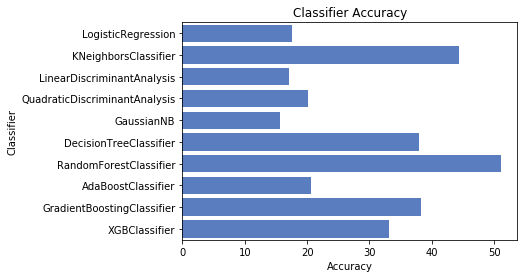

In [19]:
model_performance_visualisation(criterion='Accuracy', data=log)

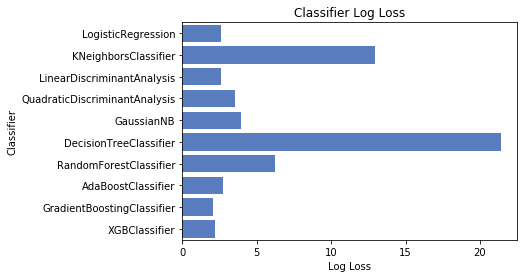

In [20]:
model_performance_visualisation("Log Loss")

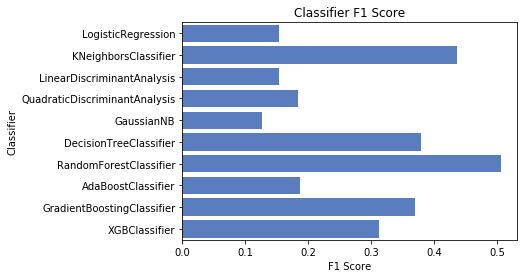

In [21]:
model_performance_visualisation(criterion='F1 Score', data=log)

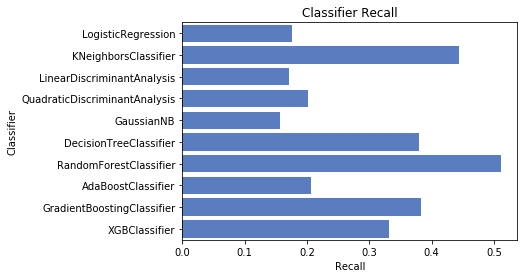

In [22]:
model_performance_visualisation("Recall")

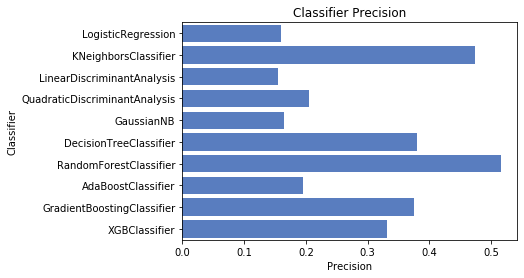

In [23]:
model_performance_visualisation("Precision")

## Grid-Search on favorite classification model

In [24]:
favorite_clf = RandomForestClassifier()

In [25]:
grid_params  = {
    'max_depth': [40, 50, 30],  # 10, 20, 30,
    'n_estimators' : [100, 200, 250],   # 10, 20, 30, 40, 
    'criterion' : ['gini', 'entropy'],
    'min_samples_leaf' : list(range(1, 5)),
    'max_features' : ['sqrt', 'log2']
}

In [26]:
grid_search = GridSearchCV(estimator=favorite_clf, param_grid=grid_params,
                           cv=3, verbose=1, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(x_train_pre, y_train)

print('Best Parameters for our classsifier')
print('='*30)
print(grid_search.best_params_)
print('='*30)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed: 53.6min finished


Best Parameters for our classsifier
{'criterion': 'gini', 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 250}


In [27]:
from pprint import pprint
favorite_clf = grid_search.best_estimator_
pprint(favorite_clf.get_params())
print('==' * 30)
test_predictions = favorite_clf.predict(x_test_pre)
report = classification_report(y_test, test_predictions)

score = accuracy_score(y_true=y_test, y_pred=test_predictions)

print(report)
print('==' * 30)
print("{} {:0.2f}%".format("Accuracy Score :: ", score * 100))

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 250,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}
              precision    recall  f1-score   support

        AC01       0.77      0.82      0.80      1092
        AC02       0.55      0.54      0.55      1012
        AC03       0.68      0.76      0.72      1033
        AC04       0.67      0.67      0.67      1221
        AC05       0.70      0.83      0.76      1001
        AC06       0.75      0.77      0.76      1006
        AC07       0.61      0.79      0.69      1185
        AC08       0.65      0.79      0.71      1166
        AC09       0.70      0.61      0.65      1185
        AC10       0.61      0.67      0.64      1301
        A

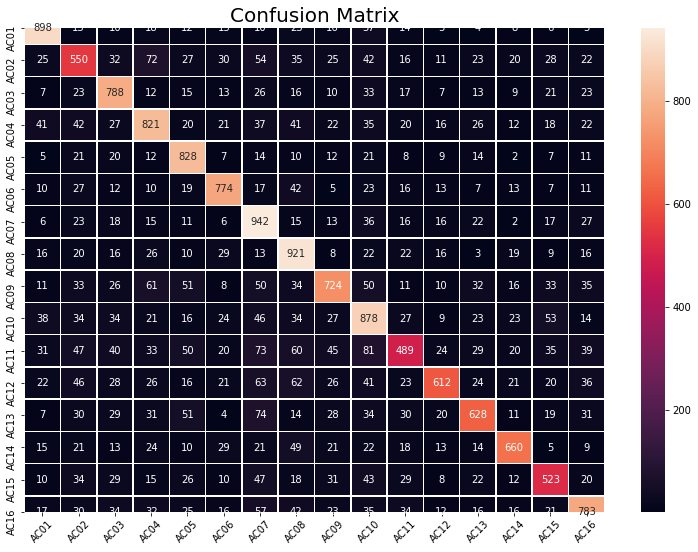

In [28]:
conf_matrix = confusion_matrix(y_test, test_predictions)
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(class_names, rotation=45)
ax.set_yticklabels(class_names)
plt.show()

In [29]:
importances = favorite_clf.feature_importances_
# feature_names = np.setdiff1d(data.columns, ["label"])
indices = np.argsort(importances)[::-1]

In [30]:
def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(12, 6))
    plt.title("Determining Feature importances \n with DecisionTreeClassifier", fontsize=18)
    plt.barh(range(len(indices)), importances[indices], color='#31B173',  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal', fontsize=14)
    plt.ylim([-1, len(indices)])

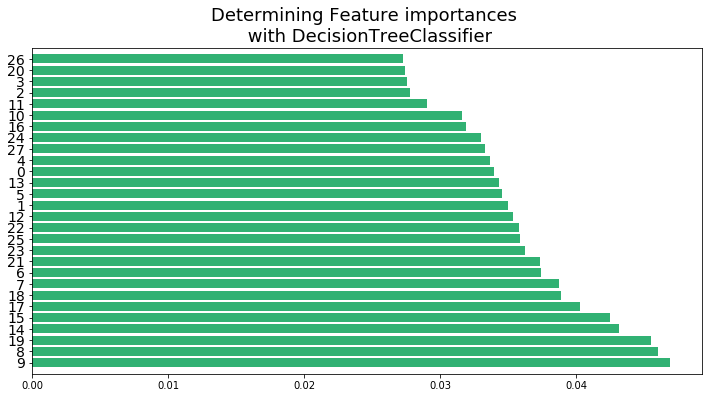

In [31]:
feature_importance_graph(indices, importances, x_cols)
plt.show()

In [32]:
import pickle
filename = './models/3mdad_randomforestmodel.pkl'
pickle.dump(clf, open(filename, 'wb'))